In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from downcast import reduce
import warnings
from plotly.io import to_image
from IPython.display import Image
import pickle
from itertools import cycle
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])


warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'plotly_express'

In [3]:
# Visión general de los datos
# 3 archivos de datos
prices = pd.read_csv('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/item_prices.csv')
sales = pd.read_csv('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/item_sales.csv')
calendar = pd.read_csv('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/daily_calendar_with_events.csv')

print("Dimensiones del dataset de ventas:", sales.shape)
print("Dimensiones del dataset de precios:", prices.shape)
print("Dimensiones del dataset de eventos:", calendar.shape)


Dimensiones del dataset de ventas: (30490, 1920)
Dimensiones del dataset de precios: (6965706, 5)
Dimensiones del dataset de eventos: (1913, 5)


In [5]:
 prices = pd.read_csv('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/item_prices.csv')
 prices.to_pickle('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/item_prices.pkl')
 sales = pd.read_csv('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/item_sales.csv')
 sales.to_pickle('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/item_sales.pkl')
 calendar = pd.read_csv('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/daily_calendar_with_events.csv')
 calendar.to_pickle('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/daily_calendar_with_events.pkl')

prices = pd.read_pickle('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/item_prices.pkl')
sales = pd.read_pickle('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/item_sales.pkl')
calendar = pd.read_pickle('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/daily_calendar_with_events.pkl')

In [6]:
sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [7]:
prices.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [8]:
calendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [9]:
# Imprime el número de eventos
print('El número de eventos es:', len(calendar['event'].unique()))

# Imprime los eventos
print('Los eventos son:', calendar['event'].unique())


El número de eventos es: 6
Los eventos son: [nan 'SuperBowl' 'Ramadan starts' 'Thanksgiving' 'NewYear' 'Easter']


### Observaciones:

Ventas:

Incluye todos los ID de los artículos, así como la categoría, departamento, tienda, región y una columna de ventas para cada día desde el 29/01/2011 hasta el 24/04/2016 (1913 días).
Precios:

Contiene los precios de venta de los artículos, como el código de la tienda respectiva y una columna con el año y la semana.
Calendario:

Tiene características de las fechas. Se presenta una columna "evento" que denomina la presencia de un determinado evento en el día o no. En total hay 4 eventos.

In [10]:
# Imprime el número de artículos
print('Número de artículos:', len(sales['id'].unique()))

# Imprime el número de departamentos
print('Número de departamentos:', len(sales['department'].unique()))

# Imprime el número de categorías
print('Número de categorías:', len(sales['category'].unique()))

# Imprime el número de tiendas
print('Número de tiendas:', len(sales['store'].unique()))

# Imprime el número de regiones
print('Número de regiones:', len(sales['region'].unique()))


Número de artículos: 30490
Número de departamentos: 7
Número de categorías: 3
Número de tiendas: 10
Número de regiones: 3


### Observaciones:
Regiones:

Nueva York, Boston y Filadelfia.
Tiendas:

Greenwich Village, Harlem, Tribeca, Brooklyn, South End, Roxbury, Back Bay, Midtown Village, Yorktown y Queen Village.
Categorías:

ACCESORIOS, HOGAR Y JARDÍN y SUPERMERCADO.
Departamentos:

ACCESORIOS_1, ACCESORIOS_2, HOGAR Y JARDÍN_1, HOGAR Y JARDÍN_2, SUPERMERCADO_1, SUPERMERCADO_2 y SUPERMERCADO_3.

### Técnica para reducir el tamaño de DataFrames

Descripción:
Esta técnica se utiliza para reducir el tamaño de los DataFrames. Básicamente, para cada columna de tipo int o float:

Se calcula el valor mínimo y máximo.
Se asigna un nuevo tipo de dato con el menor tamaño de almacenamiento posible.
Para las features categóricas:

Se cambia el tipo de dato de object a category.

Beneficios:
Reduce el tamaño del DataFrame, lo que puede mejorar el rendimiento y la eficiencia.
Ahorra memoria, lo que puede ser importante si se trabaja con conjuntos de datos grandes.

Limitaciones:
Puede haber una pequeña pérdida de precisión al reducir el tamaño de los tipos de datos numéricos.
Cambiar el tipo de dato de las features categóricas puede afectar a algunos análisis.

In [12]:
sales_bd = np.round(sales.memory_usage().sum()/(1024*1024),1)
prices_bd = np.round(prices.memory_usage().sum()/(1024*1024),1)
cal_bd = np.round(calendar.memory_usage().sum()/(1024*1024),1)

sales = pd.read_pickle("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/item_sales.pkl")
prices = pd.read_pickle("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/item_prices.pkl")
cal = pd.read_pickle("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/daily_calendar_with_events.pkl")

sales_ad = np.round(sales.memory_usage().sum()/(1024*1024),1)
prices_ad = np.round(prices.memory_usage().sum()/(1024*1024),1)
cal_ad = np.round(calendar.memory_usage().sum()/(1024*1024),1)

In [15]:
!pip3 install numpy==1.19.5

  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1583 lines of output]
      <string>:67: RuntimeWarning: NumPy 1.19.5 may not yet support Python 3.11.
      Running from numpy source directory.
      Cythonizing sources
      numpy/random/_bounded_integers.pxd.in has not changed
      numpy/random/_philox.pyx has not changed
      numpy/random/_bounded_integers.pyx.in has not changed
      numpy/random/_sfc64.pyx has not changed
      numpy/random/_mt19937.pyx has not changed
      numpy/random/bit_generator.pyx has not changed
      Processing numpy/random/_bounded_integers.pyx
      /private/var/folders/hn/58jsz1wd6jn8ypqlsj_ym3sc0000gn/T/pip-install-6w5sjsvy/numpy_94406235859d47dcb2582992a5999905/tools/cythonize.py:73: Dep

In [14]:
# Getting file size in MB before downcasting
sales_bd = np.round(sales.memory_usage().sum()/(1024*1024),1)
prices_bd = np.round(prices.memory_usage().sum()/(1024*1024),1)
cal_bd = np.round(calendar.memory_usage().sum()/(1024*1024),1)

# Downcasting the dataframes
sales = reduce(sales)
prices = reduce(prices)
cal = reduce(calendar)

# Getting size after Downcasting
sales_ad = np.round(sales.memory_usage().sum()/(1024*1024),1)
prices_ad = np.round(prices.memory_usage().sum()/(1024*1024),1)
cal_ad = np.round(calendar.memory_usage().sum()/(1024*1024),1)

AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
prices.to_pickle('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/item_prices.pkl')
sales.to_pickle('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/item_sales.pkl') 
cal.to_pickle('/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/TFM/DSMarketGrupo5/data_dsmarket/daily_calendar_with_events.pkl') 

In [ ]:
print("The size of sales (in MB) before/after downcasting: ",sales_bd,'/',sales_ad)
print("The size of prices (in MB) before/after downcasting: ",prices_bd,'/',prices_ad)
print("The size of cal (in MB) before/after downcasting: ",cal_bd,'/',cal_ad)

The size of sales (in MB) before/after downcasting:  446.6 / 95.2
The size of prices (in MB) before/after downcasting:  265.7 / 66.5
The size of cal (in MB) before/after downcasting:  0.1 / 0.1


In [ ]:
dic = {'DataFrame':['sales','prices','cal'],
       'Before downcasting':[sales_bd,prices_bd,cal_bd],
       'After downcasting':[sales_ad,prices_ad,cal_ad]}

memory = pd.DataFrame(dic)
memory = pd.melt(memory, id_vars='DataFrame', var_name='Status', value_name='Memory (MB)')
memory.sort_values('Memory (MB)',inplace=True)
fig = px.bar(memory, x='DataFrame', y='Memory (MB)', color='Status', barmode='group', text='Memory (MB)')
fig.update_traces(texttemplate='%{text} MB', textposition='outside')
fig.update_layout(template='seaborn', title='Effect of Downcasting')
fig.show()

Como se puede constatar, los dataframes prices y sales quedaron reducidos, esto, debido a que las 1913 columnas de tipo int se redujeron al datatype más pequeño.

# EDA - Exploratory Data Analisys

In [ ]:
group = sales.groupby(['region','store_code','category','department'], as_index=False)['id'].count().dropna()
group['USA'] = 'United States of America'
group.rename(columns={'region':'Region','store_code':'Store','category':'Category','department':'Department','id':'Count'},inplace=True)

In [ ]:
group = group[group['Count'] > 0]

In [ ]:
fig = px.treemap(group, path=['USA', 'Region', 'Store', 'Category', 'Department'], values='Count',
                  color='Count',
                  color_continuous_scale=px.colors.sequential.Sunset,
                  title='Distribution of Items')
fig.update_layout(template='seaborn')
fig.show()

In [ ]:
d_cols = [i for i in sales.columns if 'd_' in i]

In [ ]:
sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


## Análisis de Items

In [ ]:
sales_melted = sales.melt(id_vars=['id', 'item', 'category', 'department', 'store_code', 'region'], value_vars=[i for i in sales if i.startswith('d_')], var_name=['d'], value_name='sales')

In [18]:
sales.groupby(['id']).head(1000)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,2,...,2,0,0,0,0,0,1,0,0,1
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,6,0,...,2,1,0,2,0,1,0,0,1,0
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,1,0,0,1,0,3,1,3


### Top 3 Tendencias de ITEMS con más ventas

In [149]:
top_sales = sales_melted.groupby(['id', 'item']).sum().reset_index().sort_values(by=['sales'],ascending=False)[:3]

In [150]:
for index in range(0, 3):
    id = top_sales.iloc[index]['id']
    sales_dt = sales.loc[sales['id'] == id].set_index('id')[d_cols].T
    fig = px.line(sales_dt, title = f'{id} sales by "d" number')
    fig.show()

In [153]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['year'] = calendar['date'].dt.year.apply(int)
calendar['month'] = calendar['date'].dt.month.apply(int)
calendar['day'] = calendar['date'].dt.day.apply(int)

In [154]:
examples = []

example1 = sales.loc[sales['id'] == top_sales.iloc[0]['id']][d_cols].T
example1 = example1.rename(columns={8412:top_sales.iloc[0]['item']}) # Name it correctly
example1 = example1.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example1 = example1.merge(calendar, how='left', validate='1:1')

examples.append(example1)

example2 = sales.loc[sales['id'] == top_sales.iloc[1]['id']][d_cols].T
example2 = example2.rename(columns={18055:top_sales.iloc[1]['item']}) # Name it correctly
example2 = example2.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example2 = example2.merge(calendar, how='left', validate='1:1')

examples.append(example2)

example3 = sales.loc[sales['id'] == top_sales.iloc[2]['id']][d_cols].T
example3 = example3.rename(columns={21104:top_sales.iloc[2]['item']}) # Name it correctly
example3 = example3.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example3 = example3.merge(calendar, how='left', validate='1:1')

examples.append(example3)


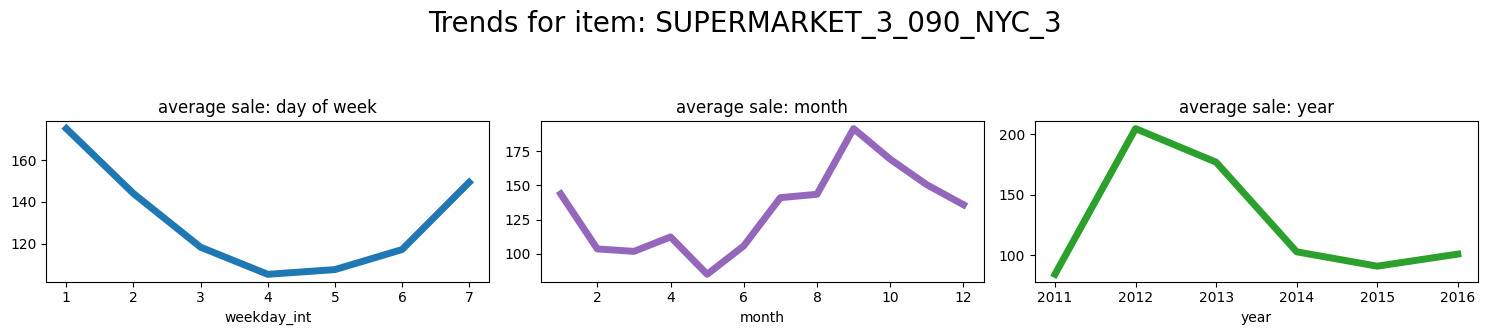

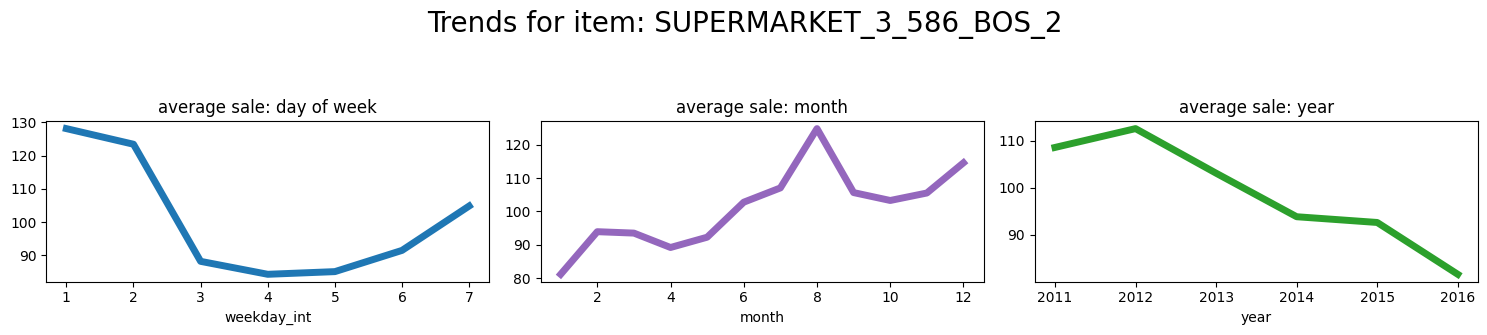

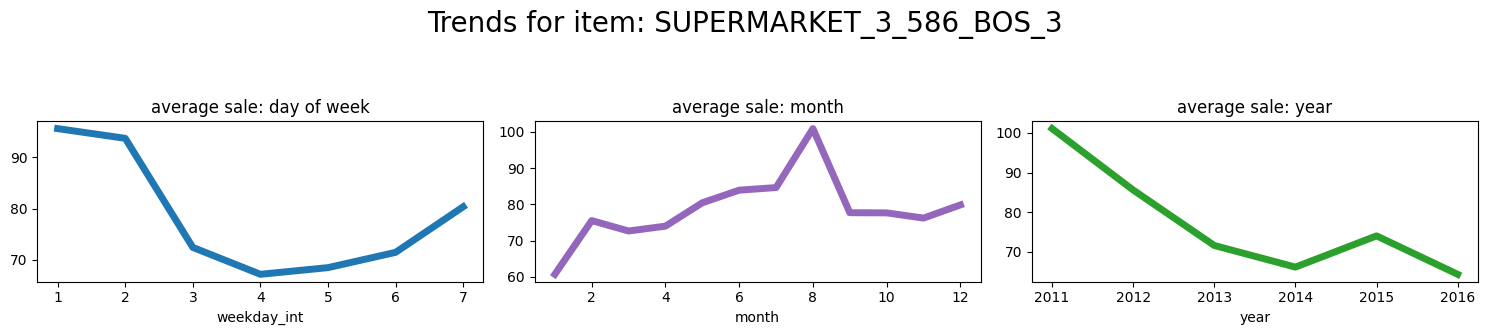

In [155]:
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    name = top_sales.iloc[i]['item']
    id = top_sales.iloc[i]['id']

    examples[i].groupby('weekday_int').mean()[name].plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)

    examples[i].groupby('month').mean()[name].plot(kind='line',
              title='average sale: month',
              lw=5,
              color=color_pal[4],
              ax=ax2)

    examples[i].groupby('year').mean()[name].plot(kind='line',
              lw=5,
              title='average sale: year',
              color=color_pal[2],
              ax=ax3)

    fig.suptitle(f'Trends for item: {id}',
                 size=20,
                 y=1.1)
                 
    plt.tight_layout()
    plt.show()

In [187]:
twenty_examples = sales.sample(20, random_state=230).set_index('id')[d_cols].T.merge(calendar.set_index('d')['date'],
    left_index=True,
    right_index=True,
    validate='1:1').set_index('date')

## Muestra de las ventas de 20 Ítems

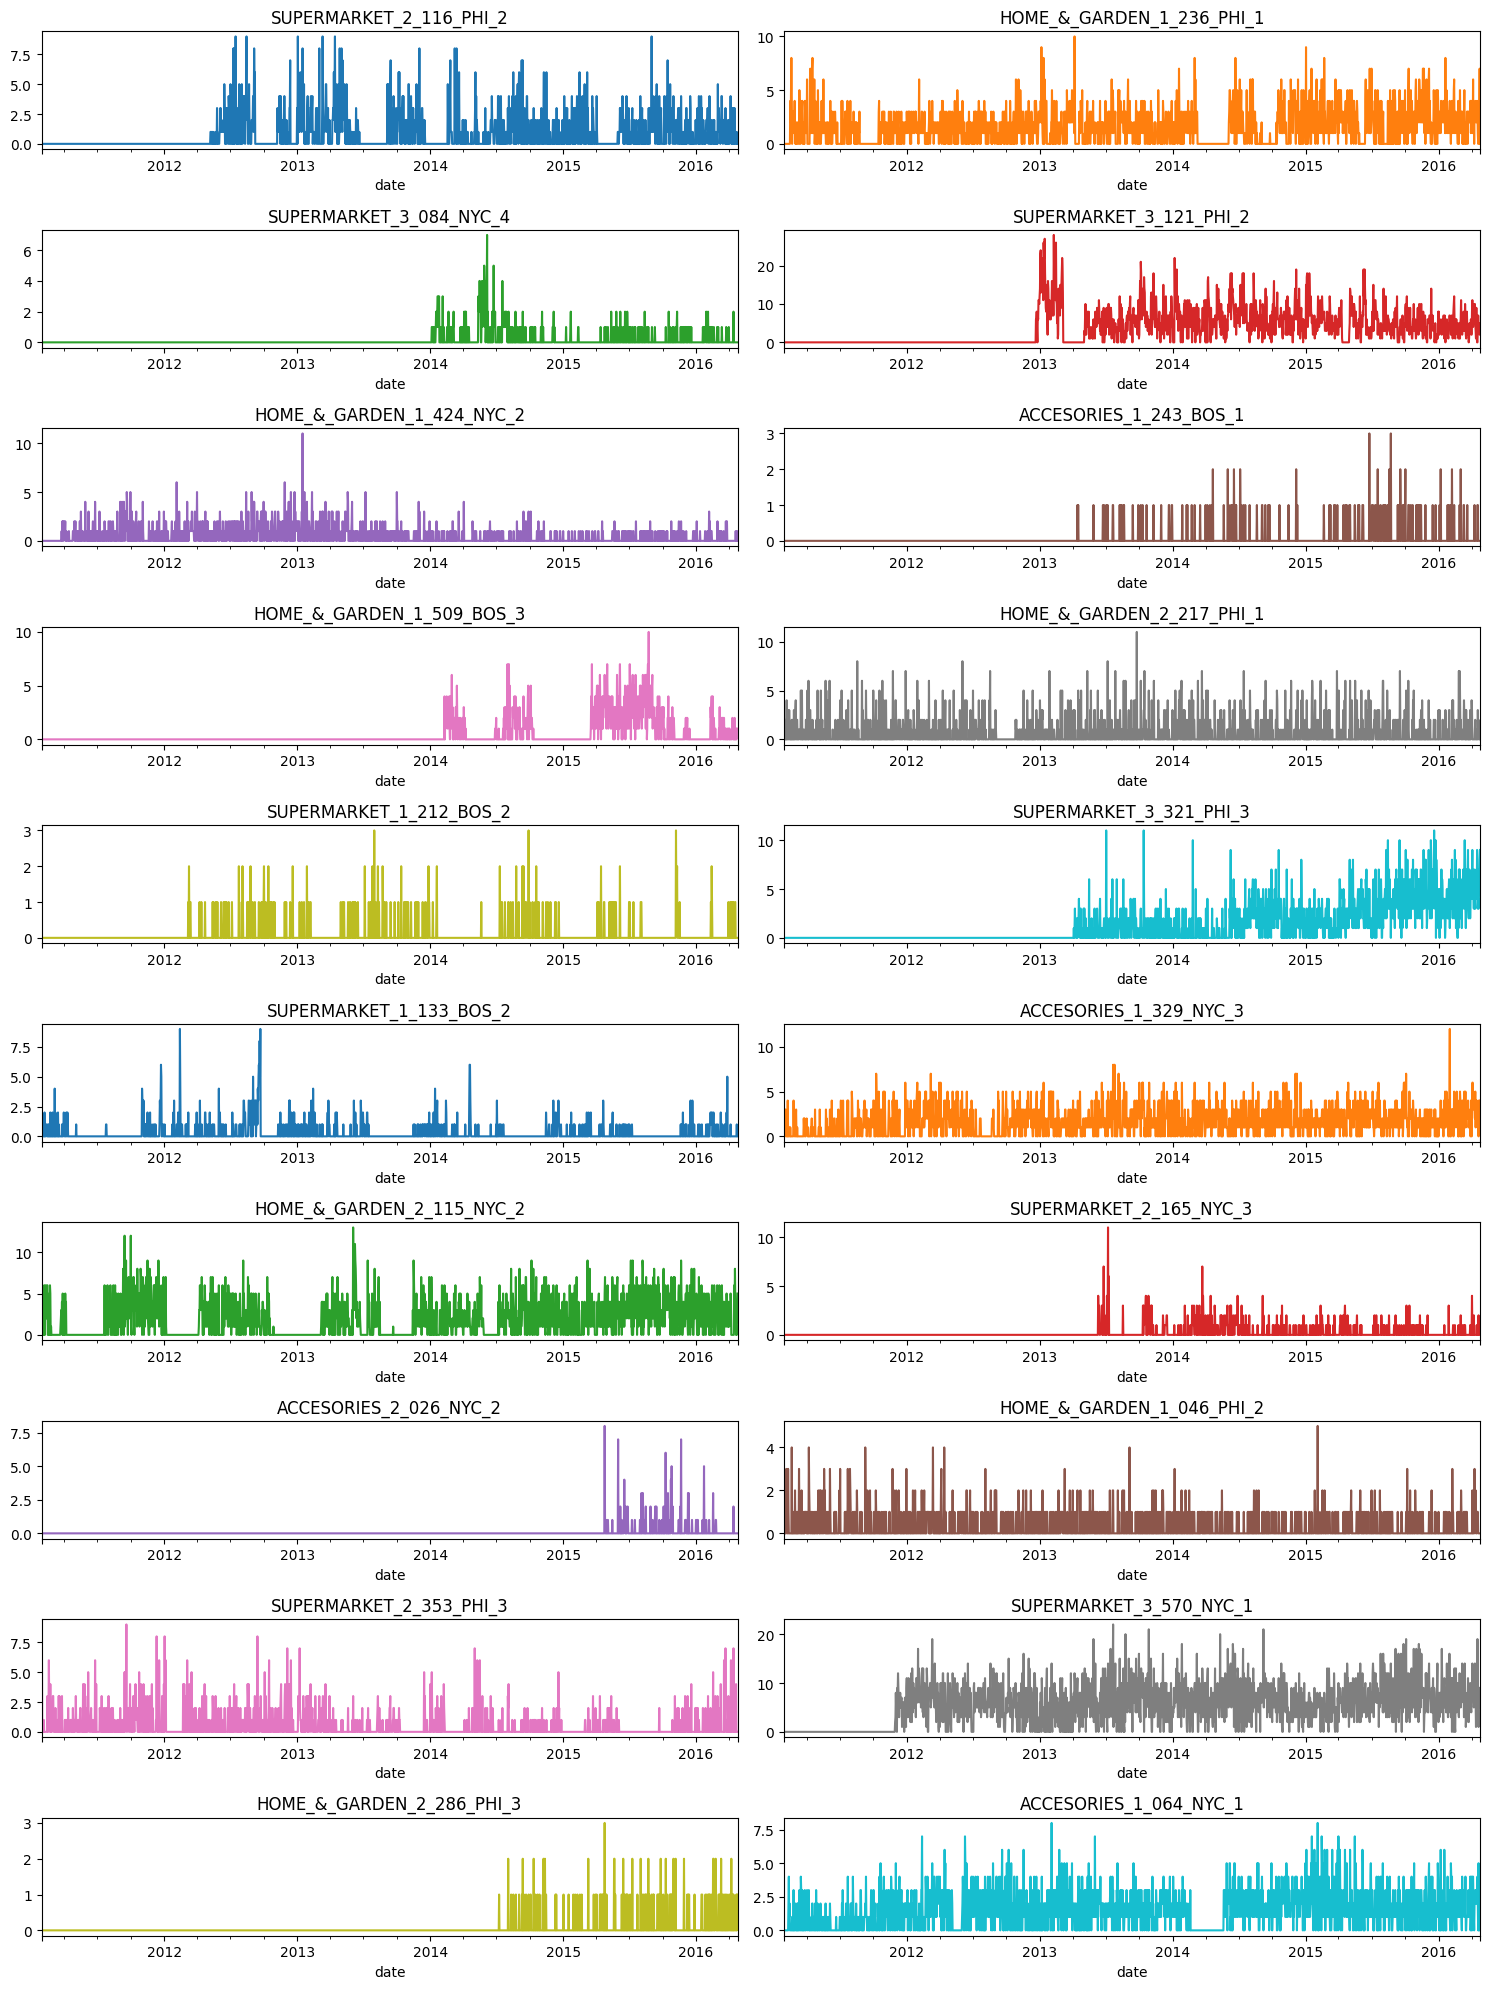

In [188]:
fig, axs = plt.subplots(10, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for item in twenty_examples.columns:
    twenty_examples[item].plot(title=item,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()

### Todas las ventas agregadas

Vamos a ver ahora el gráfico de las series con todos los valores agregados de todos los ítems, tiendas, categorías y respectivas unidades vendidas (ventas).

In [158]:

sales_df = sales[d_cols]

total_sales = list(sales_df.sum(axis = 0)) 

min_date = calendar['date'].min()
max_date = calendar['date'].max()

date_list = [d for d in pd.date_range(start = min_date, end = max_date)]
agg_sales = pd.DataFrame({'date' : date_list,'sales' : total_sales})

fig = px.line(agg_sales, x='date', y='sales', title = 'All aggregated sales')

for ser in fig['data']:
    ser['text']= [d.strftime('%Y-%m-%d') for d in agg_sales['date']]
    ser['hovertemplate']='dates=%{text} price=%{y}'

fig.show()

### Observaciones:
> - Después de un declive en las ventas en 2011, se observa una pequeña tendencia ascendente.
> - El número de ventas muy cercano a cero observado cada año corresponde al día de Navidad, el 25 de diciembre.
> - Si observamos el comportamiento semanal, se detecta la presencia de estacionalidad/patrón cíclico.

### Ventas mensuales por región

In [16]:
sales_df = sales.groupby(['region'])[d_cols].sum()

date_list = [(d.year*100)+d.month for d in pd.date_range(start = min_date, end = max_date)]

agg_sales = pd.DataFrame({'date' : date_list, 'Boston_sales' : sales_df.iloc[0], 'New_York_sales' : sales_df.iloc[1], 'Philadelphia_sales' : sales_df.iloc[2]})
monthly_agg = agg_sales.groupby('date').sum()
monthly_agg = monthly_agg.iloc[1:]

monthly_dates = [d for d in pd.date_range(start = min_date, end = max_date, freq = 'MS')]

fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_dates, y= monthly_agg['Boston_sales'],
                    mode='lines',
                    name='Boston'))
fig.add_trace(go.Scatter(x=monthly_dates, y=monthly_agg['New_York_sales'],
                    mode='lines',
                    name='New York'))
fig.add_trace(go.Scatter(x=monthly_dates, y=monthly_agg['Philadelphia_sales'],
                    mode='lines', name='Philadelphia'))

fig.update_layout(title='Monthly Aggregated Sales per Region',
                   xaxis_title='Time',
                   yaxis_title='Sales')
fig.show()

## Observaciones:

> - Comparando las ventas mensuales de las respectivas regiones, se constata que en el período presentado, Nueva York mostró un rendimiento superior al de Boston y Filadelfia.

> - También se verifica que el comportamiento de las ventas mensuales de Boston y Filadelfia es muy similar, sin embargo, a pesar de que inicialmente (2011) Boston presentaba un nivel de ventas mensuales superior al de Filadelfia, este termina (2016) con un peor rendimiento en comparación con el de Filadelfia.

In [110]:
sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


### Tendencia de ventas por tienda

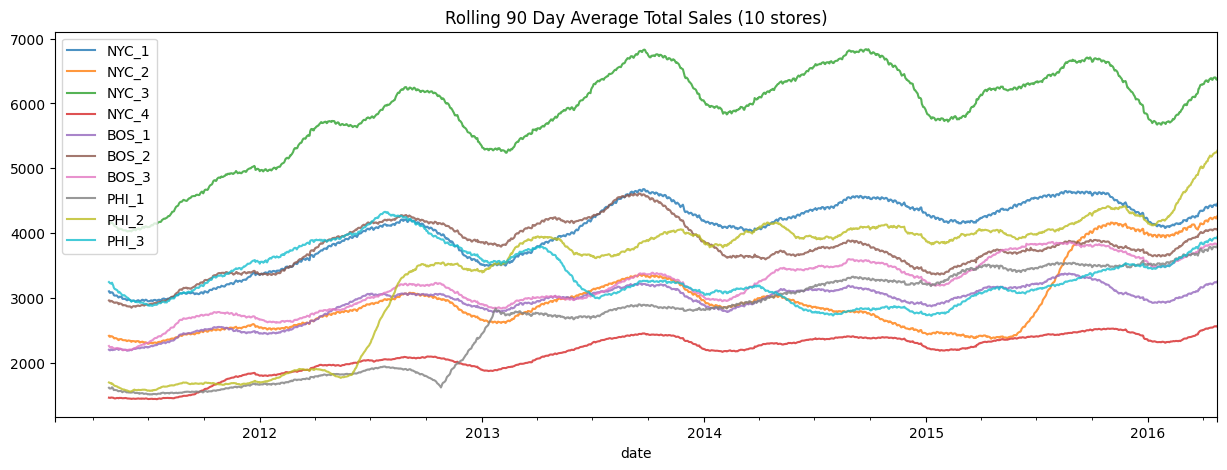

In [123]:
past_sales = sales.set_index('id')[d_cols].T.merge(calendar.set_index('d')['date'],
    left_index=True,
    right_index=True,
    validate='1:1').set_index('date')

store_list = sales['store_code'].unique()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items].sum(axis=1).rolling(90).mean().plot(figsize=(15, 5), alpha=0.8, title='Rolling 90 Day Average Total Sales (10 stores)')

plt.legend(store_list)
plt.show()

### Total de ventas por tiendas (Ordernadas de forma Ascendente)

In [17]:
sales_df = sales.groupby(['store_code'])[d_cols].sum()
store_sales = sales_df.sum(axis = 1).sort_values(ascending=False)
bar_plot = pd.DataFrame({'stores':store_sales.index, 'sales':store_sales.values})
fig = px.bar(bar_plot, x='stores', y='sales', color = 'stores', title = 'Overall Sales per Store')
fig.show()

### Media movil de ventas por tienda - Boston

In [19]:
dates = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = min_date, end = max_date)]

past_sales = sales.set_index('id')[d_cols].T

cols = [i for i in sales['store_code'].unique() if i.startswith('BOS_')]

fig = go.Figure()
for s in cols:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    fig.add_trace(go.Scatter(x=dates, y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Moving Average Sales of stores - Boston")

['BOS_1', 'BOS_2', 'BOS_3']


### Observaciones

En la región de Boston, la tienda BOS_2 tuvo el mejor desempeño y la BOS_1 el peor. Las series de ventas BOS_2 y BOS_1 presentan comportamientos similares en cuanto a la tendencia, sin embargo, enfocándose solo en las series de BOS_1 y BOS_3, estas presentan comportamientos casi idénticos en los primeros 3 años, mostrando a veces el mismo monto de ventas. También se observa que la serie BOS_3 alcanza el mejor desempeño de ventas a principios de mayo.

### Media móvil de ventas por tiendas - New York

In [20]:
cols = [i for i in sales['store_code'].unique() if i.startswith('NYC_')]

fig = go.Figure()
for s in cols:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    fig.add_trace(go.Scatter(x=dates, y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales of stores - New York")

### Observaciones

En la región de Nueva York, tal como se mencionó anteriormente, la tienda NYC_1 y la tienda NYC_4 presentan el mejor y el peor desempeño respectivamente. También se observa que los comportamientos/tendencias de ventas de las 4 tiendas son muy similares, con la excepción de la tienda NYC_2 que a mediados de junio de 2015 tiene un comportamiento inesperado y en un lapso de 5 meses casi logra duplicar las ventas, lo que corresponde a un aumento en el orden del 80%-100%.

### Media móvil de ventas por tiendas - Philadelphia

In [21]:
cols = [i for i in sales['store_code'].unique() if i.startswith('PHI_')]

fig = go.Figure()
for s in cols:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    fig.add_trace(go.Scatter(x=dates, y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales of stores in Philadelphia")

### Observaciones

En la región de Filadelfia, no existe evidencia de tendencia en las series de las tiendas. La tienda PHI_1 presenta el mejor desempeño de ventas en los primeros dos años, pero, sin embargo, muestra un decrecimiento en los siguientes dos años. En 2015, presenta nuevamente un crecimiento. En el momento inicial, PHI_2 y PHI_3 muestran ventas similares. No obstante, PHI_2 muestra un crecimiento exponencial a mediados de 2012, seguido de una tendencia creciente.

### Total de ventas por Categorías (Ordernado de forma Ascendente)
Las categorías son: ACCESORIES, HOME_&_GARDEN e SUPERMARKET.

In [22]:
sales_df = sales.groupby(['category'])[d_cols].sum()
cat_sales = sales_df.sum(axis = 1).sort_values(ascending=False)
bar_plot = pd.DataFrame({'categories':cat_sales.index, 'sales':cat_sales.values})
fig = px.bar(bar_plot, x='categories', y='sales', color = 'categories')
fig.show()

### Total de ventas de las Categorías por Departamentos.

In [24]:
sales['department'].unique()

array(['ACCESORIES_1', 'ACCESORIES_2', 'HOME_&_GARDEN_1',
       'HOME_&_GARDEN_2', 'SUPERMARKET_1', 'SUPERMARKET_2',
       'SUPERMARKET_3'], dtype=object)

In [26]:
fig = make_subplots(rows = 1,cols = 3,subplot_titles=('ACCESORIES', 'HOME_&_GARDEN', 'SUPERMARKET'),shared_yaxes = True)

depts = [[i for i in sales['department'].unique() if i.startswith('ACCESORIES_')],
    [i for i in sales['department'].unique() if i.startswith('HOME_&_GARDEN_')],
    [i for i in sales['department'].unique() if i.startswith('SUPERMARKET_')]]

dates = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = min_date, end = max_date)]

past_sales = sales.set_index('id')[d_cols].T

for i in range(len(depts)):
    cols = depts[i]
    for s in cols:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Scatter(x=dates, y=data, name=s),row = 1,col = i+1)
    
fig.update_layout(yaxis_title="Sales", title = 'Sales of categories per department')

### Observaciones

> - La categoría **SUPERMARKET** es la que más vende, seguida de **HOME_&_GARDEN** y luego **ACCESORIES**, este hecho se debe a que los productos de esta categoría son más esenciales que los otros.
> - Dentro de la categoría **SUPERMARKET** es evidente que el departamento **SUPERMARKET_3** tiene una gran cantidad de ventas lo que impulsa la categoría, y **SUPERMARKET_2** está experimentando un aumento en las ventas.
> - Dentro de la categoría **HOME_&_GARDEN** vemos una tendencia de crecimiento en el departamento **HOME_&_GARDEN_1** mientras que **HOME_&_GARDEN_2** mantiene un volumen de ventas estable.
> - Dentro de la categoría **ACCESORIES** observamos que el comportamiento de los departamentos **ACCESORIES_1** y **ACCESORIES_2** es estable.

In [160]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1913 non-null   datetime64[ns]
 1   weekday      1913 non-null   category      
 2   weekday_int  1913 non-null   int8          
 3   d            1913 non-null   category      
 4   event        26 non-null     category      
 5   year         1913 non-null   int64         
 6   month        1913 non-null   int64         
 7   day          1913 non-null   int64         
dtypes: category(3), datetime64[ns](1), int64(3), int8(1)
memory usage: 149.3 KB


In [183]:
calendar_without_na = calendar.copy()
calendar_without_na["event"] = calendar_without_na["event"].astype('object')
calendar_without_na["event"] = calendar_without_na["event"].replace(np.nan, 'NO_EVENT')
calendar_without_na["event"] = calendar_without_na["event"].astype('category')

In [185]:
calendar_without_na.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NO_EVENT
1,2011-01-30,Sunday,2,d_2,NO_EVENT
2,2011-01-31,Monday,3,d_3,NO_EVENT
3,2011-02-01,Tuesday,4,d_4,NO_EVENT
4,2011-02-02,Wednesday,5,d_5,NO_EVENT


### Media de ventas en días de Eventos vs No Evento

In [186]:
calendar = calendar_without_na.iloc[:1913]
d_no_event = list(calendar[calendar['event'] == 'NO_EVENT']['d'])
d_event = list(calendar[calendar['event'] != 'NO_EVENT']['d'])

sales_df = sales.groupby(['department']).sum()

no_mean = []
eve_mean = []

depts = sales['department'].unique()

for i in range(len(depts)):
    no_mean.append(sales_df[d_no_event].iloc[i].mean())
    eve_mean.append(sales_df[d_event].iloc[i].mean())

fig = go.Figure(data=[
    go.Bar(name='No Event', x=depts, y = no_mean),
    go.Bar(name='Event', x=depts, y = eve_mean)
])

fig.update_layout(barmode='group',title = 'Average sales on Event vs Non-Event days')
fig.show()
# img_bytes = fig.to_image(format="png")
# Image(img_bytes)

### Observaciones

> - La venta promedio en días sin evento es un poco mayor que la venta promedio en días con evento para todas las categorías, con la excepción de SUPERMARKET_3, que demuestra que en el día con evento hay un pequeño aumento en las ventas.